Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [2]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

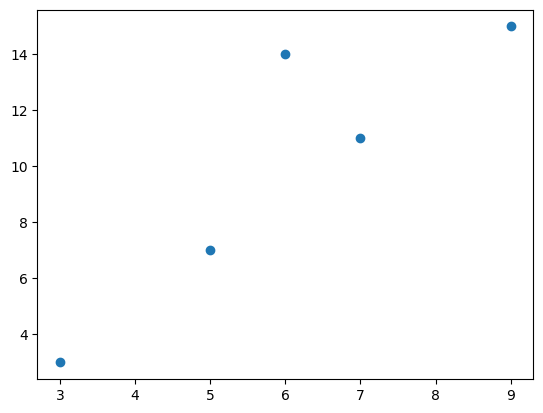

In [4]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [5]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [6]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


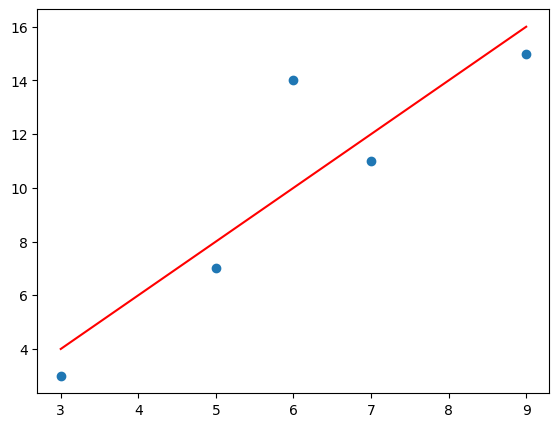

In [7]:
#Изобразим на графике исходные данные и прогнозы 
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [8]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [9]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


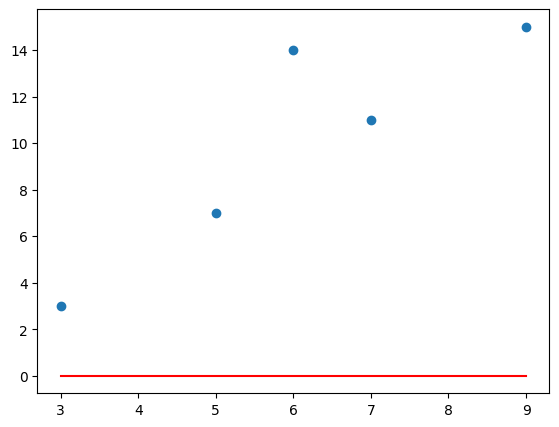

In [10]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


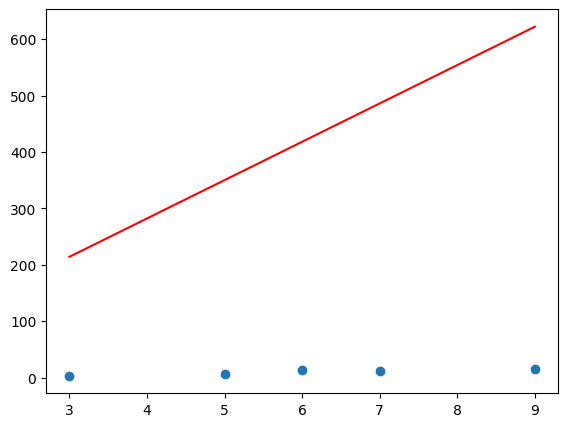

In [11]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [12]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [13]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)

5.004697916218
8.190462542210001
11.376227168202002
9.783344855206002
14.561991794194002
MSE после градиентного спуска:  4.709918696051655


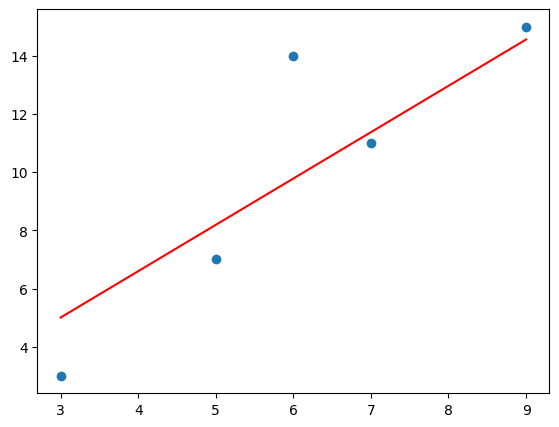

In [14]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

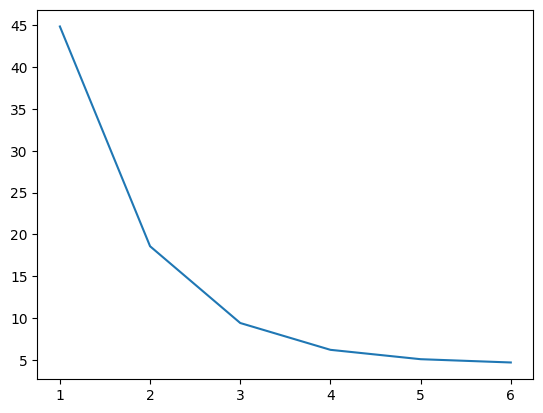

In [15]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [16]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.000028517306817


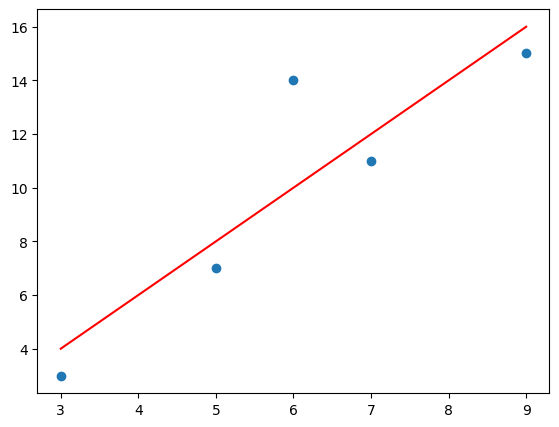

In [17]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

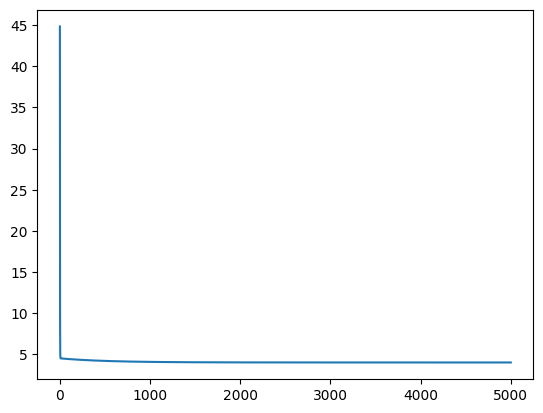

In [18]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.1903709155046345


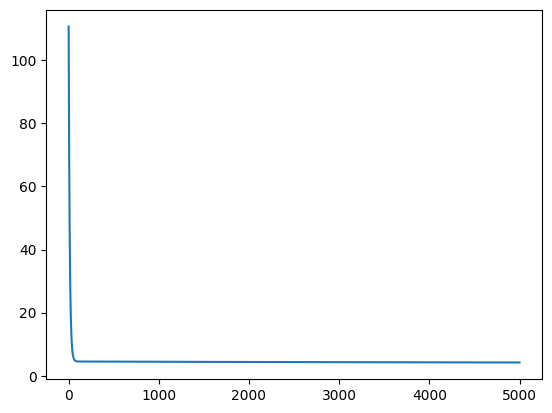

In [19]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ..., 
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

Загрузите файл Гиперспектр кукурузы.csv (с помощью pd.read_csv).

1. Вычислите аналитическим путем оценки коэффициентов парной линейной регрессии и постройте ее график.
2. Найдите оценки параметров модели парной лиенйной регрессии с использованием метода градиентного спуска. Постройте график.
3. Оцените качество построенных моделей сравнив на графике обучающую выборку и прогнозы.


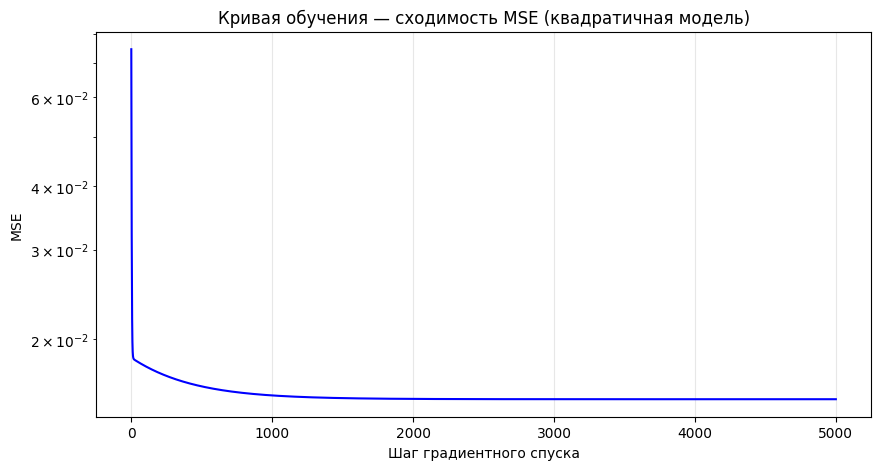

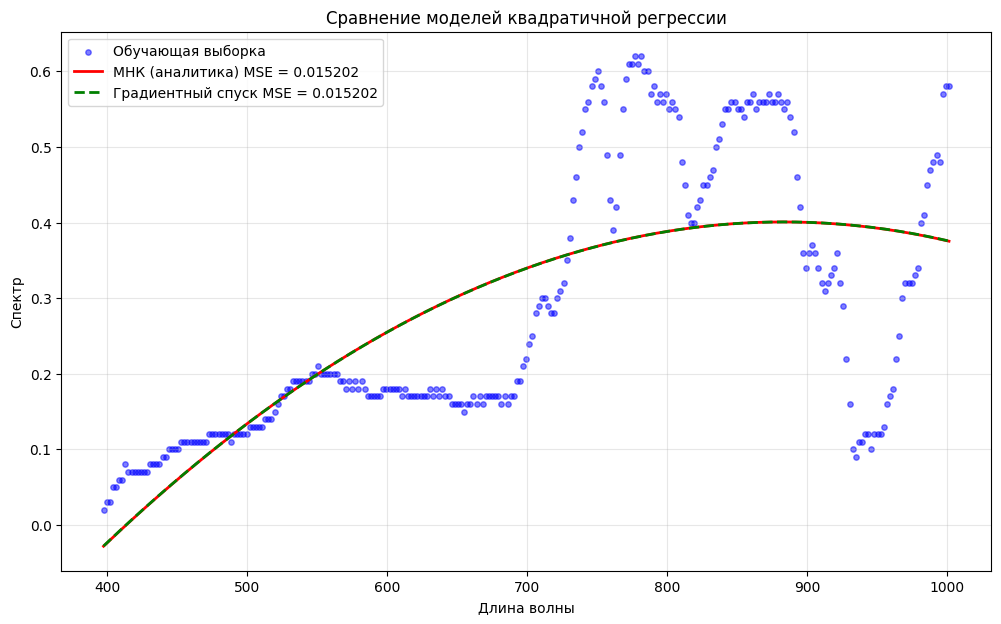

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Гиперспектр кукурузы.csv', sep=';', decimal=',')

df.columns = df.columns.str.strip()
x = df['wavelength'].values.astype(float)
Y = df['Spectr'].values.astype(float)

X = np.column_stack([np.ones_like(x), x, x**2])

coeffs, residuals, rank, s = np.linalg.lstsq(X, Y, rcond=None)
a0_analyt, a1_analyt, a2_analyt = coeffs

x_space = np.linspace(x.min(), x.max(), 200)
Y_pred_analyt = a0_analyt + a1_analyt * x_space + a2_analyt * x_space**2

class QuadraticRegressionGD:
    def __init__(self):
        self.a0 = 0.0          
        self.a1 = 0.0          
        self.a2 = 0.0          
        self.mean_x = 0.0
        self.std_x = 1.0
        self.mean_x2 = 0.0
        self.std_x2 = 1.0
        self.b0 = 0.0         
        self.b1 = 0.0
        self.b2 = 0.0

    def predict(self, x):
        """Прогноз для исходных (ненормализованных) x"""
        x_norm = (x - self.mean_x) / self.std_x
        x2_norm = (x**2 - self.mean_x2) / self.std_x2
        return self.a0 + self.a1 * x_norm + self.a2 * x2_norm

    def MSE(self, x, Y):
        return np.mean((Y - self.predict(x)) ** 2)

    def fit(self, x, Y, alpha=0.1, epsilon=1e-4, max_steps=10000):
        self.mean_x = np.mean(x)
        self.std_x = np.std(x)
        self.mean_x2 = np.mean(x**2)
        self.std_x2 = np.std(x**2)

        x_norm = (x - self.mean_x) / self.std_x
        x2_norm = (x**2 - self.mean_x2) / self.std_x2

        self.a0 = 0.0
        self.a1 = 0.0
        self.a2 = 0.0

        steps = []
        errors = []

        for step in range(1, max_steps + 1):
            y_pred = self.a0 + self.a1 * x_norm + self.a2 * x2_norm
            error = y_pred - Y

            d_a0 = 2 * np.mean(error)
            d_a1 = 2 * np.mean(error * x_norm)
            d_a2 = 2 * np.mean(error * x2_norm)

            self.a0 -= alpha * d_a0
            self.a1 -= alpha * d_a1
            self.a2 -= alpha * d_a2

            current_mse = self.MSE(x, Y)
            steps.append(step)
            errors.append(current_mse)

            if current_mse < epsilon:
                print(f'Сошлись на шаге {step}, MSE = {current_mse:.6f}')
                break

        self.b0 = self.a0 - self.a1 * self.mean_x / self.std_x - self.a2 * self.mean_x2 / self.std_x2
        self.b1 = self.a1 / self.std_x
        self.b2 = self.a2 / self.std_x2

        return steps, errors

model_gd = QuadraticRegressionGD()
steps, errors = model_gd.fit(x, Y, alpha=0.1, epsilon=0.001, max_steps=5000)

Y_pred_gd = model_gd.predict(x_space)

plt.figure(figsize=(10, 5))
plt.plot(steps, errors, 'b-')
plt.xlabel('Шаг градиентного спуска')
plt.ylabel('MSE')
plt.title('Кривая обучения — сходимость MSE (квадратичная модель)')
plt.yscale('log')
plt.grid(alpha=0.3)
plt.show()

Y_pred_full_analyt = a0_analyt + a1_analyt * x + a2_analyt * x**2
mse_analyt = np.mean((Y - Y_pred_full_analyt) ** 2)

mse_gd = model_gd.MSE(x, Y)

plt.figure(figsize=(12, 7))
plt.scatter(x, Y, label='Обучающая выборка', alpha=0.5, s=15, color='blue')
plt.plot(x_space, Y_pred_analyt, 'r-', linewidth=2,
         label=f'МНК (аналитика) MSE = {mse_analyt:.6f}')
plt.plot(x_space, Y_pred_gd, 'g--', linewidth=2,
         label=f'Градиентный спуск MSE = {mse_gd:.6f}')
plt.xlabel('Длина волны')
plt.ylabel('Спектр')
plt.title('Сравнение моделей квадратичной регрессии')
plt.legend()
plt.grid(alpha=0.3)
plt.show()